# 각 library 별 매커니즘 확인

In [79]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import numpy as np

In [64]:
import pandas as pd
Dep = pd.read_csv('Depression_sanity_1000.csv')
ADHD = pd.read_csv('ADHD_sanity_1000.csv')
bipolar = pd.read_csv('bipolar_sanity_1000.csv')
anxiety = pd.read_csv('anxiety_sanity_1000.csv')
schizo = pd.read_csv('schizo_sanity_1000.csv')
nonM = pd.read_csv('non_mental_health_sanity_1000.csv')

In [65]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
stop_words = list(set(stopwords.words('english')))
stop_words.extend(["'m"])
print()
new_stopwords = []
temp = ['hadn','mightn','mustn','wasn','couldn','doesn','hasn','ain','shan','aren','weren','wouldn','shouldn']
for word in stop_words:
    if 'not' in word: continue
    elif "'t" in word: continue
    elif len(word) == 1: continue
    elif word in temp: continue
    elif '!' in word: continue
    elif '.' in word: continue
    else: new_stopwords.append(word)
        
# 감정분석용 cleansing
def s_cleansing(List):
    
    corpus = []
    for i in List:
        url_pattern ='https?://\S+|#([0-9a-zA-Z]*)'
        i = re.sub(pattern=url_pattern, repl=' ', string = i)
        i = i.replace('\r','').replace('\n','')
        text = re.sub('[-=+,#/\?:^$”@*\"“※~&%ㆍ!』\\‘|\(\)\[\]\<\>`…》;’]', '', i.lower())
        corpus.append(text)
    return corpus




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leesangyun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/leesangyun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# word embedding용 cleansing

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
n=WordNetLemmatizer()

def w_cleansing(List):
    corpus = []
    for i in List:
        url_pattern ='https?://\S+|#([0-9a-zA-Z]*)'
        i = re.sub(pattern=url_pattern, repl=' ', string = i)
        i = i.replace('\r','').replace('\n','')
        text = re.sub('[-=+,#/\?:^$”@*\"“※~&%ㆍ!』\\‘|\(\)\[\]\<\>`…》;’]', '', i.lower())
        new_text = ''
        for j in word_tokenize(text):
            if j not in stop_words:
                new_text = new_text +lemmatize(j,change_pos_form(nltk.pos_tag([j])))+' '
        corpus.append(new_text)
    return corpus


def change_pos_form(pos):
    if 'NN' in pos[0][1]:
        new_pos = 'n'
    elif 'V' in pos[0][1]:
        new_pos = 'v'
    elif 'RB' in pos[0][1]:
        new_pos = 'r'
    elif 'JJ' in pos[0][1]:
        new_pos = 'a'
    else:
        new_pos = ''
    return new_pos

def lemmatize(word,form):
    if form !='':
        return n.lemmatize(word,form)
    else:
        return n.lemmatize(word)

In [66]:
sen,s_cleansing(sen)

(['she is good and great.', 'but she somtimes makes me angry.'],
 ['she is good and great.', 'but she somtimes makes me angry.'])

In [1868]:
dep_cleansing_w = w_cleansing(dep_mix)
ADHD_cleansing_w= w_cleansing(ADHD_mix)
bipolar_cleansing_w = w_cleansing(bipolar_mix)
anxiety_cleansing_w = w_cleansing(anxiety_mix)
schizo_cleansing_w = w_cleansing(schizo_mix)
nonM_cleansing_w = w_cleansing(nonM_mix)

In [69]:
dep_cleansing = s_cleansing(dep_mix)
ADHD_cleansing= s_cleansing(ADHD_mix)
bipolar_cleansing = s_cleansing(bipolar_mix)
anxiety_cleansing = s_cleansing(anxiety_mix)
schizo_cleansing_= s_cleansing(schizo_mix)
nonM_cleansing = s_cleansing(nonM_mix)

In [1794]:
for i in dep_cleansing_w:
    if 'about' in i:
        print(i)
        

coronavirus ruin progress make depression struggle depression high school friend mostly coast class well enough get college want excite finally could get away family around people enjoy around could thing want time feel control life oncethats exactly happen start college year wasnt easy manage find good friend get involve socially enjoy class first time year depression seem get well people thing live existence wasnt entirely awful timenow fuck virus make leave friend go back around family one drive insane first place yes still contact im able see nearly often something face face contact truly make feel well go mention online class completely ruin routine kill motivation succeed get use feel hopeless wasnt light end tunnel right manage find light world come kick right as finally hope im stuck hopeless void except there also fuck plague threatens people care aboutfuck fuck existence think shit together life give swift kick as 
cant ejaculate due depression med sexual stuff warn consider 

In [68]:
dep_mix = []
for i in (Dep['title'] + ' '+Dep['text_content']):
    dep_mix.append(i)
    
ADHD_mix = []
for i in (ADHD['title'] + ' '+ADHD['text_context']):
    ADHD_mix.append(i)

bipolar_mix = []
for i in (bipolar['title'] + ' '+bipolar['text_context']):
    bipolar_mix.append(i)
    
anxiety_mix = []
for i in (anxiety['title'] + ' '+anxiety['text_context']):
    anxiety_mix.append(i)
    
schizo_mix = []
for i in (schizo['title'] + ' '+schizo['text_context']):
    schizo_mix.append(i)
    
nonM_mix=[]
for i in (nonM['title']+' '+nonM['text_context']):
    nonM_mix.append(i)
    

In [7]:
test= "“she is beautiful. but sometimes, she makes me angry. I think that she will be a good person. I believe that she mustn't be a bad person. I'm going to tell about this. go to https://www.you.com"
word = test.replace('.','').replace(',','').split(' ')
sen = tokenize.sent_tokenize(test)



## Vader  
널리 알려져있다시피 dictionary-based sentiment analysis 방식.  
주어진 문장 내에서 사전에 등재된 단어 찾기 및 해당 단어의 점수 파악  
단순히 단어에 매칭된 rating을 return 하는 것이 아니라 단어들이 쓰여지는 방식과 문맥을 어느정도 고려. 
  
매커니즘  
1) 대문자로 표시된 단어는 전체 의미 방향을 유지한 채 강조의 의미로 받아들인다.  
2) 느낌표는 긍,부정의 강도를 높인다.  
3) 특정 부사(ex-extremely)는 의미 방향을 유지한 채 강도를 높인다.  
4) 동일 문장 두개의 마침표 여부는 score에 영향을 주지 않는다.  
5) 긍/부정을 나타내는 수식어(ex- extreme, really)는 피수식어를 강조한다.  
6) 문장이 but을 포함할때 but 전,후의 감정을 모두 고려하지만 후의 정서는 훨씬 비중있게 처리된다.해당 접속사(but)앞의 감정 정도를 50% 낮추고 뒤의 감정 정도를 50% 증가시킨다.단, however와 같은 다른 대조어구는 인지하지 못한다.  
7) 이중 부정 감지가 가능하다.  
reference: http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf


In [60]:
test= "she is good and great. but she somtimes makes me angry."
word = test.replace('.','').replace(',','').split(' ')
sen = tokenize.sent_tokenize(test)

## 글 전체를 input으로 도출한 수치

In [38]:
sid = SentimentIntensityAnalyzer()
num = sid.polarity_scores(test)['compound']
num

-0.2382

## 문장 단위 input으로 도출한 수치의 합

In [39]:
#for sen
num = 0
for i in sen:
    print(i)
    print('compound: ',sid.polarity_scores(i)['compound'])
    num = num + sid.polarity_scores(i)['compound']

print('compound 총합: ',num)

she is good and great.
compound:  0.7906
but she somtimes makes me angry.
compound:  -0.6652
compound 총합:  0.12539999999999996


## 단어 단위 input으로 도출한 수치의 합

In [40]:
#for words
num = 0
for i in word:
    print(i)
    print('compound: ',sid.polarity_scores(i)['compound'])
    num = num + sid.polarity_scores(i)['compound']
    print()
    
print()
print('compound 총합: ',num)

she
compound:  0.0

is
compound:  0.0

good
compound:  0.4404

and
compound:  0.0

great
compound:  0.6249

but
compound:  0.0

she
compound:  0.0

somtimes
compound:  0.0

makes
compound:  0.0

me
compound:  0.0

angry
compound:  -0.5106


compound 총합:  0.5547000000000001


## 같은 글의 문장 순서를 도치한 것을 input으로 넣었을 때의 수치

In [55]:
test= "but she somtimes makes me angry. she is good and great."
num = sid.polarity_scores(test)['compound']
num

0.7227

## 같은 글 내 문장순서만 바꿔서 결과 도출

In [416]:
test2= "she is beautiful. I think that she will be a good person. I'm going to tell about this. I believe that she mustn't be a bad person. but she sometimes makes me angry."
sen2 = tokenize.sent_tokenize(test2)

num = sid.polarity_scores(test2)['compound']
print(num)

num = 0
for i in sen2:
    print(i)
    print('compound: ',sid.polarity_scores(i)['compound'])
    num = num + sid.polarity_scores(i)['compound']
print()
print('compound 총합: ',num)

-0.0323
she is beautiful.
compound:  0.5994
I think that she will be a good person.
compound:  0.4404
I'm going to tell about this.
compound:  0.0
I believe that she mustn't be a bad person.
compound:  0.431
but she sometimes makes me angry.
compound:  -0.6652

compound 총합:  0.8056000000000001


## TextBlob

In [49]:
from textblob import TextBlob
test

'she is good and great. but she somtimes makes me angry.'

In [51]:
#for all
TextBlob(test).sentiment.polarity

0.3333333333333333

In [53]:
num = 0
for i in sent_tokenize(test):
    print(i)
    print(TextBlob(i).sentiment.polarity)
    num = num + TextBlob(i).sentiment.polarity
num

she is good and great.
0.75
but she somtimes makes me angry.
-0.5


0.25

In [54]:
num = 0
for i in word_tokenize(test):
    print(i)
    print(TextBlob(i).sentiment.polarity)
    num = num + TextBlob(i).sentiment.polarity
num

she
0.0
is
0.0
good
0.7
and
0.0
great
0.8
.
0.0
but
0.0
she
0.0
somtimes
0.0
makes
0.0
me
0.0
angry
-0.5
.
0.0


1.0

In [564]:
test2= "she is beautiful. I think that she will be a good person. I'm going to tell about this. I believe that she mustn't be a bad person. but she sometimes makes me angry."
TextBlob(test2).sentiment.polarity


0.0875

In [101]:
num = 0
for i in word:
    print(i)
    print('each: ',TextBlob(i).sentiment.polarity)
    num = num + TextBlob(i).sentiment.polarity
print()
print('each 총합: ',num)

she
each:  0.0
is
each:  0.0
beautiful
each:  0.85
but
each:  0.0
sometimes
each:  0.0
she
each:  0.0
makes
each:  0.0
me
each:  0.0
angry
each:  -0.5
I
each:  0.0
think
each:  0.0
that
each:  0.0
she
each:  0.0
will
each:  0.0
be
each:  0.0
a
each:  0.0
good
each:  0.7
person
each:  0.0
I
each:  0.0
believe
each:  0.0
that
each:  0.0
she
each:  0.0
mustn't
each:  0.0
be
each:  0.0
a
each:  0.0
bad
each:  -0.6999999999999998
person
each:  0.0
I'm
each:  0.0
going
each:  0.0
to
each:  0.0
tell
each:  0.0
about
each:  0.0
this
each:  0.0

each 총합:  0.35


## Afinn

In [58]:
from afinn import Afinn
afn = Afinn(emoticons=True)

In [110]:
afn.score(test)

3.0

In [111]:
num = 0
for i in sen:
    print(i)
    print('each: ',afn.score(i))
    num = num + afn.score(i)
print()
print('each 총합: ',num)

she is good and great.
each:  6.0
but she somtimes makes me angry.
each:  -3.0

each 총합:  3.0


In [104]:
num = 0
for i in word:
    print(i)
    print('each: ',afn.score(i))
    num = num + afn.score(i)
    print()
print()
print('each 총합: ',num)

she
each:  0.0

is
each:  0.0

beautiful
each:  3.0

but
each:  0.0

sometimes
each:  0.0

she
each:  0.0

makes
each:  0.0

me
each:  0.0

angry
each:  -3.0

I
each:  0.0

think
each:  0.0

that
each:  0.0

she
each:  0.0

will
each:  0.0

be
each:  0.0

a
each:  0.0

good
each:  3.0

person
each:  0.0

I
each:  0.0

believe
each:  0.0

that
each:  0.0

she
each:  0.0

mustn't
each:  0.0

be
each:  0.0

a
each:  0.0

bad
each:  -3.0

person
each:  0.0

I'm
each:  0.0

going
each:  0.0

to
each:  0.0

tell
each:  0.0

about
each:  0.0

this
each:  0.0


each 총합:  0.0


## labMT

In [72]:
import sys, os
from labMTsimple.storyLab import *
import codecs ## handle utf8
emotionFileReader(stopval=0.0,lang='english',returnVector=True)

({'laughter': ['1', '8.50', '0.9313', '3600', '--', '--', '1728\r\n'],
  'happiness': ['2', '8.44', '0.9723', '1853', '2458', '--', '1230\r\n'],
  'love': ['3', '8.42', '1.1082', '25', '317', '328', '23\r\n'],
  'happy': ['4', '8.30', '0.9949', '65', '1372', '1313', '375\r\n'],
  'laughed': ['5', '8.26', '1.1572', '3334', '3542', '--', '2332\r\n'],
  'laugh': ['6', '8.22', '1.3746', '1002', '3998', '4488', '647\r\n'],
  'laughing': ['7', '8.20', '1.1066', '1579', '--', '--', '1122\r\n'],
  'excellent': ['8', '8.18', '1.1008', '1496', '1756', '3155', '--\r\n'],
  'laughs': ['9', '8.18', '1.1551', '3554', '--', '--', '2856\r\n'],
  'joy': ['10', '8.16', '1.0568', '988', '2336', '2723', '809\r\n'],
  'successful': ['11', '8.16', '1.0759', '2176', '1198', '1565', '--\r\n'],
  'win': ['12', '8.12', '1.0812', '154', '3031', '776', '694\r\n'],
  'rainbow': ['13', '8.10', '0.9949', '2726', '--', '--', '1723\r\n'],
  'smile': ['14', '8.10', '1.0152', '925', '2666', '2898', '349\r\n'],
  'won': 

In [73]:
def my_labMT(text):
    labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang='english',returnVector=True)
    ## compute valence score and return frequency vector for generating wordshift
    Valence,Fvec = emotion(text,labMT,shift=True,happsList=labMTvector)
    ## but we didn't apply a lens yet, so stop the vectors first
    StoppedVec = stopper(Fvec,labMTvector,labMTwordList,stopVal=1.0)
    Valence = emotionV(StoppedVec,labMTvector)
    #print('the valence of {0} is {1:.5}'.format('input data',Valence))
    return Valence

In [74]:
labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang='english',returnVector=True)
sample = nonM['text_context'].iloc[0]
print(sample)
print(my_labMT(sample))
print(my_labMT(nonM_cleansing[0]))


After 2 years and a half, I (24) ended up my relationship. No crying at the phone, no more reproach, no more hard feelings. I don’t want to lie to you guys, it hurts a lot because I madly loved this man, and I still love him. Yes, I am hurt, my cheast is feels heavy, I have no energy left. 

But you know, sometimes, love is just not enough.

I am just tired of fighting. Especially, when I am the only one who’s fighting to keep this relationship. 

I am tired of promises. “I promise you that we will be fine, I will keep you close, I will put you first.”

I am tired of secrets, and not assuming your relationship “We can’t do that, because my mom doesn’t know about you. I do not have a specific reason why I can not tell her about you, I guess she is just crazy, and I want to avoid any conflict”

I am tired of dramas. “After a fight, I will not reach you. You have to beg me to speak with you, because I made a mistake, but I will act that you are crazy, and you value nothing, so even if it

## 각 라이브러리 / input 형태 별 도출 결과 분포 확인

### 전체 글 대상

In [97]:
#cleansing
v_nonM_all_p=[]
for i in nonM_cleansing:
    ss = sid.polarity_scores(i)
    v_nonM_all_p.append(ss['compound'])
    
t_nonM_all_p = []
for i in nonM_cleansing:
    t_nonM_all_p.append(TextBlob(i).sentiment.polarity)
    
a_nonM_all_p = []
for i in nonM_cleansing:
    a_nonM_all_p.append(afn.score(i))
    
l_nonM_all_p = []
for i in nonM_cleansing:
    l_nonM_all_p.append(my_labMT(i))



In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
empty = [[i] for i in a_nonM_all_p]
a_p = scaler.fit_transform(empty)

l_nonM_all = []
for i in range(len(l_nonM_all_p)):
    if l_nonM_all_p[i] <0:
        l_nonM_all.append(np.median(l_nonM_all_p))
    else:
        l_nonM_all.append(l_nonM_all_p[i])
empty = [[i] for i in l_nonM_all]
l_p = scaler.fit_transform(empty)



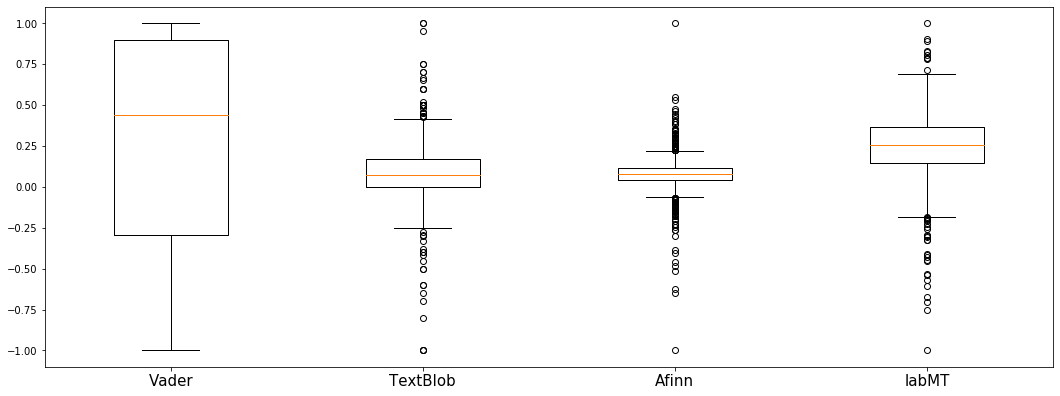

In [99]:

plt.rcParams["figure.figsize"] = (14,5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot((v_nonM_all_p,t_nonM_all_p,[i[0] for i in a_p],[i[0] for i in l_p]))
ax.set_xticklabels(['Vader', 'TextBlob', 'Afinn','labMT'],fontsize = 15)
plt.show()

In [89]:
data = {'Vader' : v_nonM_all_p,'TextBlob' : t_nonM_all_p,'Afinn' : [i[0] for i in a_p],'labMT' : [i[0] for i in l_p]}
df_senti = pd.DataFrame(data,columns = ['Vader','TextBlob','Afinn','labMT'])
df_senti

,Vader,TextBlob,Afinn,labMT
0,-0.9945,-0.053923,-0.155378,0.065905
1,-0.9241,0.058664,-0.139442,0.188580
2,0.9835,0.187729,0.163347,0.183276
3,0.1121,-0.060504,0.003984,0.113185
4,-0.1756,0.043444,0.059761,0.198140
...,...,...,...,...
997,0.8299,0.250000,0.051793,0.051333
998,0.0000,0.000000,0.059761,0.253629
999,0.8823,-0.048333,0.027888,0.140552
1000,0.9904,0.298684,0.219124,0.370133


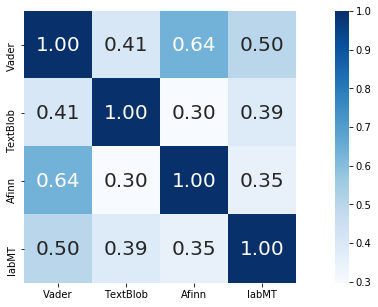

In [88]:
corr = df_senti.corr()
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')



Text(0, 0.5, 'Distribution')

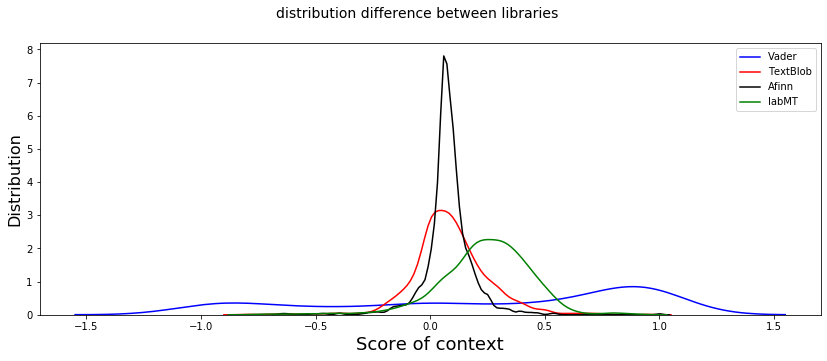

In [84]:
fig = sns.kdeplot(v_nonM_all_p, color='blue',clip=(-1,1), label = 'Vader')
fig = sns.kdeplot(t_nonM_all_p, color='red',clip=(-1,1),label = 'TextBlob')
fig = sns.kdeplot([i[0] for i in a_p],clip=(-1,1),color='black', label = 'Afinn')
fig = sns.kdeplot([i[0] for i in l_p],clip=(-1,1),color='green', label = 'labMT')
fig.figure.suptitle("distribution difference between libraries", fontsize = 14)
plt.xlabel('Score of context', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

## 문장단위

In [95]:
v_nonM_sen=[]
for i in nonM_cleansing:
    para = tokenize.sent_tokenize(i) 
    num=0
    for j in para:
        num = num + sid.polarity_scores(j)['compound']
    v_nonM_sen.append(num)
    
t_nonM_sen=[]
for i in nonM_cleansing:
    para = tokenize.sent_tokenize(i) 
    num=0
    for j in para:
        num = num + TextBlob(j).sentiment.polarity
    t_nonM_sen.append(num)
    
a_nonM_sen=[]
for i in nonM_cleansing:
    para = tokenize.sent_tokenize(i) 
    num=0
    for j in para:
        num = num + afn.score(j)
    a_nonM_sen.append(num)

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
empty =[[i] for i in v_nonM_sen]
v_sen = scaler.fit_transform(empty)

empty = [[i] for i in a_nonM_sen]
a_sen = scaler.fit_transform(empty)

empty = [[i] for i in t_nonM_sen]
t_sen = scaler.fit_transform(empty)

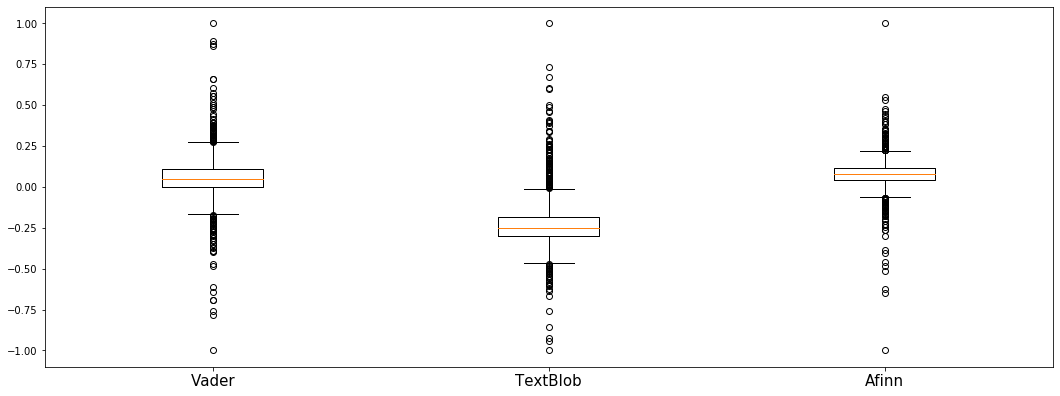

In [102]:
plt.rcParams["figure.figsize"] = (14,5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(([i[0] for i in v_sen],[i[0] for i in t_sen],[i[0] for i in a_sen]))
ax.set_xticklabels(['Vader', 'TextBlob', 'Afinn'],fontsize = 15)
plt.show()

In [103]:
data = {'Vader' : [i[0] for i in v_sen],'TextBlob' : [i[0] for i in t_sen],'Afinn' : [i[0] for i in a_sen]}
df_senti = pd.DataFrame(data,columns = ['Vader','TextBlob','Afinn'])
df_senti

,Vader,TextBlob,Afinn
0,-0.293347,-0.394264,-0.155378
1,0.033660,0.016462,-0.139442
2,0.232482,0.406126,0.163347
3,0.102159,-0.374049,0.003984
4,-0.049671,-0.215346,0.059761
...,...,...,...
997,0.099182,-0.258179,0.051793
998,0.021077,-0.298003,0.059761
999,0.153227,-0.296941,0.027888
1000,0.322785,-0.068284,0.219124


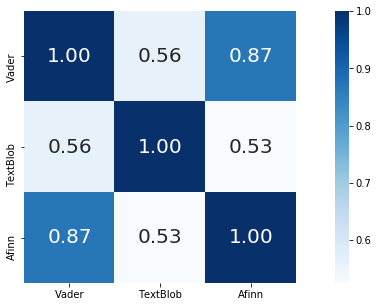

In [104]:
corr = df_senti.corr()
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')


corr 결과: 단어단위 분석이나 문장 단위 분석을 진행할 때 vader와 afinn의 결과는 거의 동일한 결과값을 낸다.

## 단어단위

In [105]:
v_nonM_word=[]
for i in nonM_cleansing:
    para = tokenize.word_tokenize(i) 
    num=0
    for j in para:
        num = num + sid.polarity_scores(j)['compound']
    v_nonM_word.append(num)
    
t_nonM_word=[]
for i in nonM_cleansing:
    para = tokenize.word_tokenize(i) 
    num=0
    for j in para:
        num = num + TextBlob(j).sentiment.polarity
    t_nonM_word.append(num)
    
a_nonM_word=[]
for i in nonM_cleansing:
    para = tokenize.word_tokenize(i) 
    num=0
    for j in para:
        num = num + afn.score(j)
    a_nonM_word.append(num)

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
empty =[[i] for i in v_nonM_word]
v_word = scaler.fit_transform(empty)

empty = [[i] for i in a_nonM_word]
a_word = scaler.fit_transform(empty)

empty = [[i] for i in t_nonM_word]
t_word = scaler.fit_transform(empty)

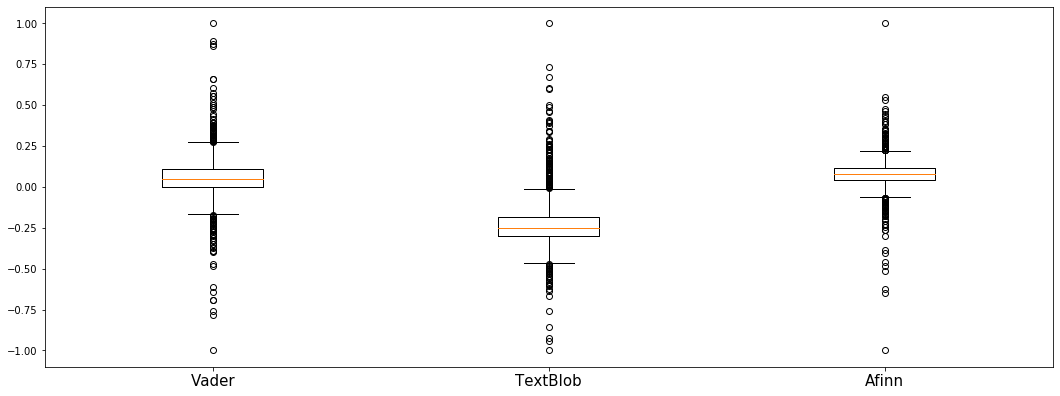

In [107]:
plt.rcParams["figure.figsize"] = (14,5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(([i[0] for i in v_sen],[i[0] for i in t_sen],[i[0] for i in a_sen]))
ax.set_xticklabels(['Vader', 'TextBlob', 'Afinn'],fontsize = 15)
plt.show()

In [108]:
data = {'Vader' : [i[0] for i in v_word],'TextBlob' : [i[0] for i in t_word],'Afinn' : [i[0] for i in a_word]}
df_senti = pd.DataFrame(data,columns = ['Vader','TextBlob','Afinn'])
df_senti

,Vader,TextBlob,Afinn
0,-0.193683,-0.693364,-0.152
1,-0.072098,-0.389069,-0.136
2,0.218385,-0.238439,0.200
3,-0.007796,-0.759183,0.008
4,0.041727,-0.570511,0.064
...,...,...,...
997,-0.017686,-0.683090,0.056
998,-0.010673,-0.697969,0.064
999,0.014515,-0.755499,0.032
1000,0.218072,-0.354278,0.224


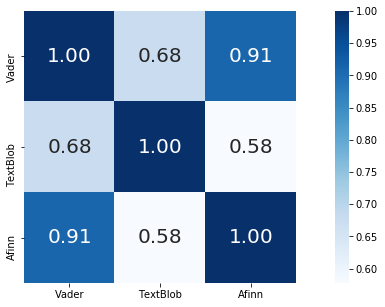

In [109]:
corr = df_senti.corr()
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')



# Word Embedding을 이용한 Classification test

## Random sampling
nonM_data와 dep_data를 랜덤으로 셔플하고 70%는 트레이닝 데이터, 나머지 30%는 테스트 데이터로 삼았다.

In [2116]:
from sklearn.model_selection import train_test_split

nonM_text = [i[0] for i in nonM_data]
nonM_label = [i[1] for i in nonM_data]
dep_text = [i[0] for i in dep_data]
dep_label = [i[1] for i in dep_data]
sanity_test = pd.DataFrame({"text":nonM_text+dep_text,"label":nonM_label+dep_label})
def split_train_test(sanity_test, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(sanity_test['text'], 
                                                        sanity_test['label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test


X_train, X_test, Y_train, Y_test = split_train_test(sanity_test)

X_train_cv,X_test_cv,Y_train_cv,Y_test_cv = train_test_split(X_train,Y_train)

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]


Value counts for Train sentiments
0    703
1    698
Name: label, dtype: int64
Value counts for Test sentiments
1    302
0    299
Name: label, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
   index                                               text
0    401  theoretically lose 1lb fat single cardio sessi...
1   1083  n't like people want left alone people always ...
2    236  anyone suffer abuse student physical severe em...
3    421  question workout video hi everyone wonder best...
4    684  would tell guy really date pregnant child kind...


# one-hot encoding

In [318]:
nltk.download('wordnet') # 어간 추출용
nltk.download('averaged_perceptron_tagger') #품사태깅용

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leesangyun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/leesangyun/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [1723]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
n=WordNetLemmatizer()
s = PorterStemmer()
test = "finally The pink sweater fitted her perfectly"
for i in word_tokenize(test):
    print(nltk.pos_tag([i]))

print(nltk.pos_tag(['told']))
print(n.lemmatize('has'))
print(n.lemmatize('has', 'v'))
print(n.lemmatize('had', 'v'))
print(n.lemmatize('having', 'v'))
print(n.lemmatize('dies'))
print(n.lemmatize('dies','v'))
print(n.lemmatize('finally'))
print(n.lemmatize('fighting','v'))

#print([s.stem(w) for w in word_tokenize('say said saying')])

[('finally', 'RB')]
[('The', 'DT')]
[('pink', 'NN')]
[('sweater', 'NN')]
[('fitted', 'VBN')]
[('her', 'PRP$')]
[('perfectly', 'RB')]
[('told', 'NN')]
ha
have
have
have
dy
die
finally
fight


In [1724]:
def change_pos_form(pos):
    if 'NN' in pos[0][1]:
        new_pos = 'n'
    elif 'V' in pos[0][1]:
        new_pos = 'v'
    elif 'RB' in pos[0][1]:
        new_pos = 'r'
    elif 'JJ' in pos[0][1]:
        new_pos = 'a'
    else:
        new_pos = ''
    return new_pos

def lemmatize(word,form):
    if form !='':
        return n.lemmatize(word,form)
    else:
        return n.lemmatize(word)

In [2143]:
all_words = [lemmatize(word,change_pos_form(nltk.pos_tag([word]))) for text in X_train['text'].values for word in word_tokenize(text)]

In [2144]:
all_words

['theoretically',
 'lose',
 '1lb',
 'fat',
 'single',
 'cardio',
 'session',
 'go',
 'try',
 'advise',
 'anyone',
 'else',
 'try',
 'something',
 "'ve",
 'thought',
 'expert',
 'would',
 'like',
 'know',
 'else',
 'go',
 'first',
 'assumption',
 'hypothetical',
 'test',
 'burn',
 '500',
 'calorie',
 'per',
 'hour',
 'cardio',
 'session',
 'last',
 '7',
 'hour',
 'straight',
 'electrolyte',
 'ok',
 'start',
 'cramp',
 'ketogenic',
 'state',
 'glucose',
 'level',
 'next',
 'nothing',
 'start',
 'input',
 'exact',
 'amount',
 'water',
 'lsoe',
 'sweat',
 'amp',
 'limited',
 'knowledge',
 'make',
 'sense',
 'body',
 'try',
 'low',
 'metabolic',
 'rate',
 'order',
 'reduce',
 'amount',
 'energy',
 'expenditure',
 'still',
 'go',
 'output',
 '500',
 'calhour',
 'anyone',
 'explain',
 'may',
 'may',
 'effective',
 'respect',
 'goal',
 'thanks',
 "n't",
 'like',
 'people',
 'want',
 'left',
 'alone',
 'people',
 'always',
 'shitty',
 'mei',
 'ugly',
 "n't",
 'know',
 'act',
 'social',
 'situat

In [1080]:
nonM_all_words = [lemmatize(word,change_pos_form(nltk.pos_tag([word]))) for text in nonM_data for word in word_tokenize(text[0])]
dep_all_words = [lemmatize(word,change_pos_form(nltk.pos_tag([word]))) for text in dep_data for word in word_tokenize(text[0])]
adhd_all_words = [lemmatize(word,change_pos_form(nltk.pos_tag([word]))) for text in adhd_data for word in word_tokenize(text[0])]
anx_all_words = [lemmatize(word,change_pos_form(nltk.pos_tag([word]))) for text in anx_data for word in word_tokenize(text[0])]
bipolar_all_words = [lemmatize(word,change_pos_form(nltk.pos_tag([word]))) for text in bipolar_data for word in word_tokenize(text[0])]
schizo_all_words = [lemmatize(word,change_pos_form(nltk.pos_tag([word]))) for text in schizo_data for word in word_tokenize(text[0])]

In [1082]:
n = 100
text = nltk.Text(nonM_all_words)
nonM_selected_words = [f[0] for f in text.vocab().most_common(n)]
text = nltk.Text(dep_all_words)
dep_selected_words = [f[0] for f in text.vocab().most_common(n)]
text = nltk.Text(anx_all_words)
anx_selected_words = [f[0] for f in text.vocab().most_common(n)]
text = nltk.Text(bipolar_all_words)
bipolar_selected_words = [f[0] for f in text.vocab().most_common(n)]
text = nltk.Text(adhd_all_words)
adhd_selected_words = [f[0] for f in text.vocab().most_common(n)]
text = nltk.Text(schizo_all_words)
schizo_selected_words = [f[0] for f in text.vocab().most_common(n)]



,nonM
0,i
1,be
2,to
3,and
4,a
...,...
95,by
96,need
97,school
98,should


In [1512]:
common_num = 210
text = nltk.Text(all_words)

selected_words = [f[0] for f in text.vocab().most_common(common_num)] 

selected_words


['i',
 'be',
 'to',
 'and',
 'a',
 'the',
 'my',
 'it',
 'have',
 'do',
 'of',
 'that',
 'in',
 'me',
 '’',
 'for',
 'but',
 "n't",
 'with',
 'this',
 'just',
 'feel',
 'so',
 'she',
 'like',
 'he',
 'get',
 'on',
 'not',
 "'m",
 'her',
 'go',
 'want',
 'or',
 'you',
 "'s",
 'about',
 'we',
 'at',
 'know',
 'what',
 't',
 'all',
 'time',
 'out',
 'if',
 'up',
 'can',
 'because',
 'when',
 'they',
 'how',
 'make',
 'him',
 'year',
 'm',
 'say',
 'life',
 'friend',
 'really',
 'would',
 'day',
 'even',
 'thing',
 'try',
 'now',
 'think',
 'one',
 'no',
 's',
 'from',
 "'ve",
 'myself',
 'there',
 'people',
 'some',
 'start',
 'well',
 'more',
 'help',
 'work',
 'will',
 'take',
 'them',
 'an',
 'any',
 'his',
 'talk',
 'see',
 'never',
 ';',
 'only',
 'back',
 'who',
 'then',
 'much',
 'don',
 'after',
 'other',
 'bad',
 'ca',
 'by',
 'need',
 'school',
 'good',
 'love',
 'could',
 'tell',
 'very',
 'come',
 'always',
 'way',
 'into',
 'something',
 'week',
 'anything',
 'depression',
 '

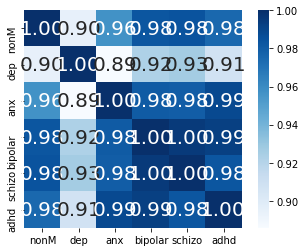

In [1326]:
nonM_common_w = [term_frequency(i[0]) for i in nonM_cleansing_w]
nonM_common = []
for i in range(common_num):
    n = 0
    for j in nonM_common_w:
        n = n + j[i]
    nonM_common.append(n)
    
dep_common_w = [term_frequency(i[0]) for i in dep_cleansing_w]
dep_common = []
for i in range(common_num):
    n = 0
    for j in dep_common_w:
        n = n + j[i]
    dep_common.append(n)
    
anx_common_w = [term_frequency(i[0]) for i in anxiety_cleansing_w]
anx_common = []
for i in range(common_num):
    n = 0
    for j in anx_common_w:
        n = n + j[i]
    anx_common.append(n)
    
    
bipolar_common_w = [term_frequency(i[0]) for i in bipolar_cleansing_w]
bipolar_common = []
for i in range(common_num):
    n = 0
    for j in bipolar_common_w:
        n = n + j[i]
    bipolar_common.append(n)
    
adhd_common_w = [term_frequency(i[0]) for i in ADHD_cleansing_w]
adhd_common = []
for i in range(common_num):
    n = 0
    for j in adhd_common_w:
        n = n + j[i]
    adhd_common.append(n)
    
schizo_common_w = [term_frequency(i[0]) for i in schizo_cleansing_w]
schizo_common = []
for i in range(common_num):
    n = 0
    for j in schizo_common_w:
        n = n + j[i]
    schizo_common.append(n)
df = pd.DataFrame({'nonM':nonM_common,'dep':dep_common,'anx':anx_common,'bipolar':bipolar_common,'schizo':schizo_common,'adhd':adhd_common})
df_heatmap = sns.heatmap(df.corr(), cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

In [1808]:
X_train['text'][0]

"question beginner 6 ' 2 188 cm tall weight 125lbs 57 kg main goal build musle gain weight always 5 exercise pullups ohp deadlifts reverse butterfly biceps curl wirh 3 set always programnow question often train per week many day regeneration day exercisealso calculate eat around 3000 calorie day order gain weight need hit number every day day exercisei apologise noob question visit several website watch lot youtube video still unsure confuse two thing "

In [1503]:
x_train = [term_frequency(i) for i in X_train['text']]
x_test = [term_frequency(i) for i in X_test['text']]
"""
x_train_sum = [sum(i) for i in x_train]
x_test_sum = [sum(i) for i in x_test]
for i in x_train_sum:
    if i ==0:
        i =1
for i in x_test_sum:
    if i ==0:
        i = 1

x_train = [[j/x_train_sum[i] for j in x_train[i]] for i in range(len(x_train))]
x_test = [[j/x_test_sum[i] for j in x_test[i]] for i in range(len(x_test))]"""

'\nx_train_sum = [sum(i) for i in x_train]\nx_test_sum = [sum(i) for i in x_test]\nfor i in x_train_sum:\n    if i ==0:\n        i =1\nfor i in x_test_sum:\n    if i ==0:\n        i = 1\n\nx_train = [[j/x_train_sum[i] for j in x_train[i]] for i in range(len(x_train))]\nx_test = [[j/x_test_sum[i] for j in x_test[i]] for i in range(len(x_test))]'

In [1504]:
scaler = MinMaxScaler(feature_range=(0,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [1505]:
import numpy as np
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(Y_train['label']).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_test = np.asarray(Y_test['label']).astype('float32')

In [1507]:
x_train

array([[0.02560241, 0.01526718, 0.01886792, ..., 0.        , 0.        ,
        0.        ],
       [0.03012048, 0.03053435, 0.00943396, ..., 0.        , 0.        ,
        0.        ],
       [0.05271084, 0.08396947, 0.04716981, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04518072, 0.0610687 , 0.08490566, ..., 0.        , 0.        ,
        0.        ],
       [0.02560241, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00451807, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

정신질환(dep)의 예측 성능을 알아보기 위해 confusion matrix를 만들도록 한다.

In [1510]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',C = 1) #(kernel = >방사 기저함수,default,C=>파라미터들의 오차허용 정도,gamma => 결정 경계의 유연성정도)
classifier.fit(x_train,y_train)

TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(x_test)):
    if(classifier.predict([x_test[i]]) == y_test[i]):
        if(y_test[i] == 1):
            TP = TP + 1
        else:
            TN = TN + 1
    elif(classifier.predict([x_test[i]]) != y_test[i]):
        if(y_test[i] == 1):
            FN = FN + 1
        else:
            FP = FP + 1
    else:
        print(classifier.predict[x_test[i]],y_test[i])

print("dep으로 예측 및 맞춘 횟수: ",TP)
print("nonM으로 예측 및 맞춘 횟수: ",TN)
print("정신질환으로 예측 및 틀린 횟수(nonM이 실제값)",FN)
print("nonM으로 예측 및 틀린 횟수(dep이 실제값)",FP)

dep으로 예측 및 맞춘 횟수:  200
nonM으로 예측 및 맞춘 횟수:  284
정신질환으로 예측 및 틀린 횟수(nonM이 실제값) 108
nonM으로 예측 및 틀린 횟수(dep이 실제값) 9


In [1511]:
a = TP+TN+FN+FP
accuracy = (TP + TN)/(TP+TN+FN+FP)
precision = (TP)/(TP+FP)
recall = (TP)/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print("총 데이터:",a)
print("accuracy: ",accuracy)
print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1_score)

총 데이터: 601
accuracy:  0.8053244592346089
precision:  0.9569377990430622
recall:  0.6493506493506493
f1_score:  0.7736943907156673


## 전체 sanity 대상으로

In [672]:
np.random.shuffle(nonM_data)
np.random.shuffle(dep_data)
np.random.shuffle(adhd_data)
np.random.shuffle(bipolar_data)
np.random.shuffle(schizo_data)
np.random.shuffle(anx_data)
training = nonM_data[:700]+dep_data[:700]+adhd_data[:700]+bipolar_data[:700] + schizo_data[:700] + anx_data[:700]
test = nonM_data[700:]+dep_data[700:]+adhd_data[700:]+bipolar_data[700:] + schizo_data[700:] + anx_data[700:]
np.random.shuffle(training)
np.random.shuffle(test)

In [673]:
training_text = [i[0] for i in training]
all_words = [lemmatize(word,change_pos_form(nltk.pos_tag([word]))) for text in training_text for word in word_tokenize(text) ]

In [675]:
text = nltk.Text(all_words)

selected_words = [f[0] for f in text.vocab().most_common(2500)] 

x_train = [term_frequency(i[0]) for i in training]
x_test = [term_frequency(i[0]) for i in test]
y_train = [i[1] for i in training]
y_test = [i[1] for i in test]
x_train_sum = [sum(i) for i in x_train]
x_test_sum = [sum(i) for i in x_test]

for i in range(len(x_train_sum)):
    if x_train_sum[i] == 0:
        x_train_sum[i] = 1

for i in range(len(x_test_sum)):
    if x_test_sum[i] == 0:
        x_test_sum[i] = 1
x_train = [[l/x_train_sum[i] for l in x_train[i]] for i in range(len(x_train))]
x_test = [[l/x_test_sum[i] for l in x_test[i]] for i in range(len(x_test))]

In [1209]:
x_train[0]

array([0.        , 0.        , 0.01851852, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [676]:
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [677]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',C = 60 ,gamma = 30)
classifier.fit(x_train,y_train)

correct = 0
for i in range(len(x_test)):
    if(classifier.predict([x_test[i]]) == y_test[i]):
        correct = correct + 1
        
print("총 test 데이터 갯수: ",len(x_test))
print("accuracy: ",correct/len(x_test))

총 test 데이터 갯수:  1802
accuracy:  0.6853496115427303


### one hot encoding

In [1357]:
lenlist = np.array([ len(word_tokenize(i)) for i in X_train])


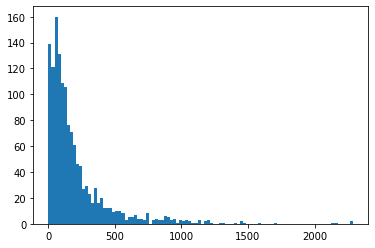

In [1358]:
import matplotlib.pyplot as plt

plt.hist((lenlist), bins=100)
plt.show()

In [1360]:
print("training data의 최소 단어 갯수: ",min(lenlist))
print("training data의 최대 단어 갯수: ",max(lenlist))
print("training data의 총 단어 갯수 평균: ",sum(lenlist)/len(lenlist))
print("training data의 중간값: ",np.median(lenlist))

training data의 최소 단어 갯수:  2
training data의 최대 단어 갯수:  2287
training data의 총 단어 갯수 평균:  209.43683083511777
training data의 중간값:  124.0


In [2138]:
from sklearn.feature_extraction.text import CountVectorizer


vect = CountVectorizer(stop_words="english")
x_train = vect.fit_transform(X_train['text']).toarray()    
x_test = vect.transform(X_test['text']).toarray()
y_train = Y_train['label']
y_test = Y_test['label']

In [2065]:
len(x_train[0]),len(x_test[0])

(11536, 11536)

In [1824]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [2067]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',C = 1) #(kernel = >방사 기저함수,default,C=>파라미터들의 오차허용 정도,gamma => 결정 경계의 유연성정도)
classifier.fit(x_train,y_train)

TP = 0 #dep예측, 실제값 dep
TN = 0 #nonM예측, 실제값 nonM
FP = 0 #nonM예측, 실제값 dep
FN = 0 #dep예측, 실제값 nonM
for i in range(len(x_test)):
    if(classifier.predict([x_test[i]]) == y_test[i]):
        if(y_test[i] == 1):
            TP = TP + 1
        else:
            TN = TN + 1
    elif(classifier.predict([x_test[i]]) != y_test[i]):
        if(y_test[i] == 1):
            FP = FP + 1
        else:
            FN = FN + 1
    else:
        print(classifier.predict[x_test[i]],y_test[i])

print("dep으로 예측 및 맞춘 횟수: ",TP)
print("nonM으로 예측 및 맞춘 횟수: ",TN)
print("dep으로 예측 및 틀린 횟수(nonM이 실제값)",FN)
print("nonM으로 예측 및 틀린 횟수(dep이 실제값)",FP)

a = TP+TN+FN+FP
accuracy = (TP + TN)/(TP+TN+FN+FP)
precision = (TP)/(TP+FP)
recall = (TP)/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print("총 데이터:",a)
print("accuracy: ",accuracy)
print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1_score)

dep으로 예측 및 맞춘 횟수:  224
nonM으로 예측 및 맞춘 횟수:  276
dep으로 예측 및 틀린 횟수(nonM이 실제값) 24
nonM으로 예측 및 틀린 횟수(dep이 실제값) 77
총 데이터: 601
accuracy:  0.831946755407654
precision:  0.7441860465116279
recall:  0.9032258064516129
f1_score:  0.8160291438979963


## TF-IDF

In [2070]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
x_train = tfidf.fit_transform(X_train['text']).toarray()    
x_test = tfidf.transform(X_test['text']).toarray()
y_train = Y_train['label']
y_test = Y_test['label']

In [2071]:
len(x_train[0]),len(x_test[0])

(11536, 11536)

In [2072]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
len(tfidf.vocabulary_)

11536

In [2073]:
classifier = SVC(kernel = 'linear',C = 1) #(kernel = >방사 기저함수,default,C=>파라미터들의 오차허용 정도,gamma => 결정 경계의 유연성정도)
classifier.fit(x_train,y_train)

TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(x_test)):
    if(classifier.predict([x_test[i]]) == y_test[i]):
        if(y_test[i] == 1):
            TP = TP + 1
        else:
            TN = TN + 1
    elif(classifier.predict([x_test[i]]) != y_test[i]):
        if(y_test[i] == 1):
            FP = FP + 1
        else:
            FN = FN + 1
    else:
        print(classifier.predict[x_test[i]],y_test[i])

print("dep으로 예측 및 맞춘 횟수: ",TP)
print("nonM으로 예측 및 맞춘 횟수: ",TN)
print("dep으로 예측 및 틀린 횟수(nonM이 실제값)",FN)
print("nonM으로 예측 및 틀린 횟수(dep이 실제값)",FP)


a = TP+TN+FN+FP
accuracy = (TP + TN)/(TP+TN+FN+FP)
precision = (TP)/(TP+FP)
recall = (TP)/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print("총 데이터:",a)
print("accuracy: ",accuracy)
print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1_score)

dep으로 예측 및 맞춘 횟수:  270
nonM으로 예측 및 맞춘 횟수:  251
dep으로 예측 및 틀린 횟수(nonM이 실제값) 49
nonM으로 예측 및 틀린 횟수(dep이 실제값) 31
총 데이터: 601
accuracy:  0.8668885191347754
precision:  0.8970099667774086
recall:  0.8463949843260188
f1_score:  0.8709677419354839


## W2V

In [2087]:
train = []
for i in X_train['text'].values:
    empty = []
    for j in word_tokenize(i):
        if j not in stop_words:
            empty.append(j)
    train.append(empty)
train_token = []
for i in train:
    train_token.extend(i)
    
train_token = list(set(train_token))

test = []
for i in X_test['text'].values:
    empty = []
    for j in word_tokenize(i):
        if j not in stop_words and j in train_token:
            empty.append(j)
    test.append(empty)
    
len(train_token)

11861

In [2088]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(train, min_count = 0, size = 100, window = 5, sg = 1)

In [2078]:
w2v_model.wv['depression']

array([-8.86829346e-02,  1.81233361e-02,  1.95320457e-01,  6.25413959e-04,
       -3.56163710e-01,  1.72437862e-01,  8.50853845e-02, -1.49005875e-01,
        1.19181164e-01,  4.09894705e-01, -2.36347094e-02, -4.53743011e-01,
        1.14115328e-01,  4.13975343e-02, -9.75080505e-02, -1.93161264e-01,
        1.93594262e-01, -4.05737311e-01,  7.30498374e-01,  2.29849190e-01,
        1.03152707e-01, -3.89060080e-02, -5.38343728e-01,  2.04560757e-01,
        2.18429849e-01,  1.62706092e-01, -2.80223191e-01, -1.15013853e-01,
       -9.02025104e-02,  9.27507598e-03,  2.32041925e-02, -4.02811706e-01,
        4.12676245e-01,  5.07018454e-02, -1.94288850e-01,  1.88638940e-01,
       -4.91445288e-02, -2.33472481e-01, -2.50100732e-01,  2.75579542e-01,
        7.43617192e-02, -9.08051953e-02, -4.71558869e-01,  2.29394138e-01,
       -1.40411615e-01,  2.02762008e-01,  1.39753759e-01, -1.98598027e-01,
       -3.21494132e-01, -4.30515528e-01, -2.31287569e-01, -2.39041537e-01,
       -5.94085634e-01, -

100차원으로 나타낸 단어들 중 'depression'과 가장 가까운 단어 top 20, 가장 먼 단어 top 20을 선정한 후 2차원으로 줄여서 시각화해보았다.

In [2079]:
depressed_n = w2v_model.wv.most_similar(negative = ['depression'],topn=20)
depressed_p = w2v_model.wv.most_similar(['depression'],topn=20)
depressed_n,depressed_p

([('ik', -0.297920286655426),
  ('heavy', -0.3919239044189453),
  ('1x10', -0.46678972244262695),
  ('x8', -0.4784544110298157),
  ('teacher', -0.4921720623970032),
  ('”', -0.49303093552589417),
  ('“', -0.5068821907043457),
  ('teach', -0.510300874710083),
  ('student', -0.5187422633171082),
  ('light', -0.5476554036140442),
  ('te', -0.549052894115448),
  ('ask', -0.5550631880760193),
  ('om', -0.5588265061378479),
  ('hour', -0.5735269784927368),
  ('en', -0.5899127125740051),
  ('school', -0.6019511222839355),
  ('smugly', -0.6046236753463745),
  ('week', -0.6124900579452515),
  ('praten', -0.6164088249206543),
  ('mee', -0.6191266775131226)],
 [('anxiety', 0.9780222773551941),
  ('diagnose', 0.9463164806365967),
  ('depressed', 0.944288969039917),
  ('suffer', 0.9359716176986694),
  ('struggle', 0.9277605414390564),
  ('bad', 0.9223863482475281),
  ('suicidal', 0.918402910232544),
  ('severe', 0.9086560010910034),
  ('social', 0.9076538681983948),
  ('deal', 0.9051889181137085),


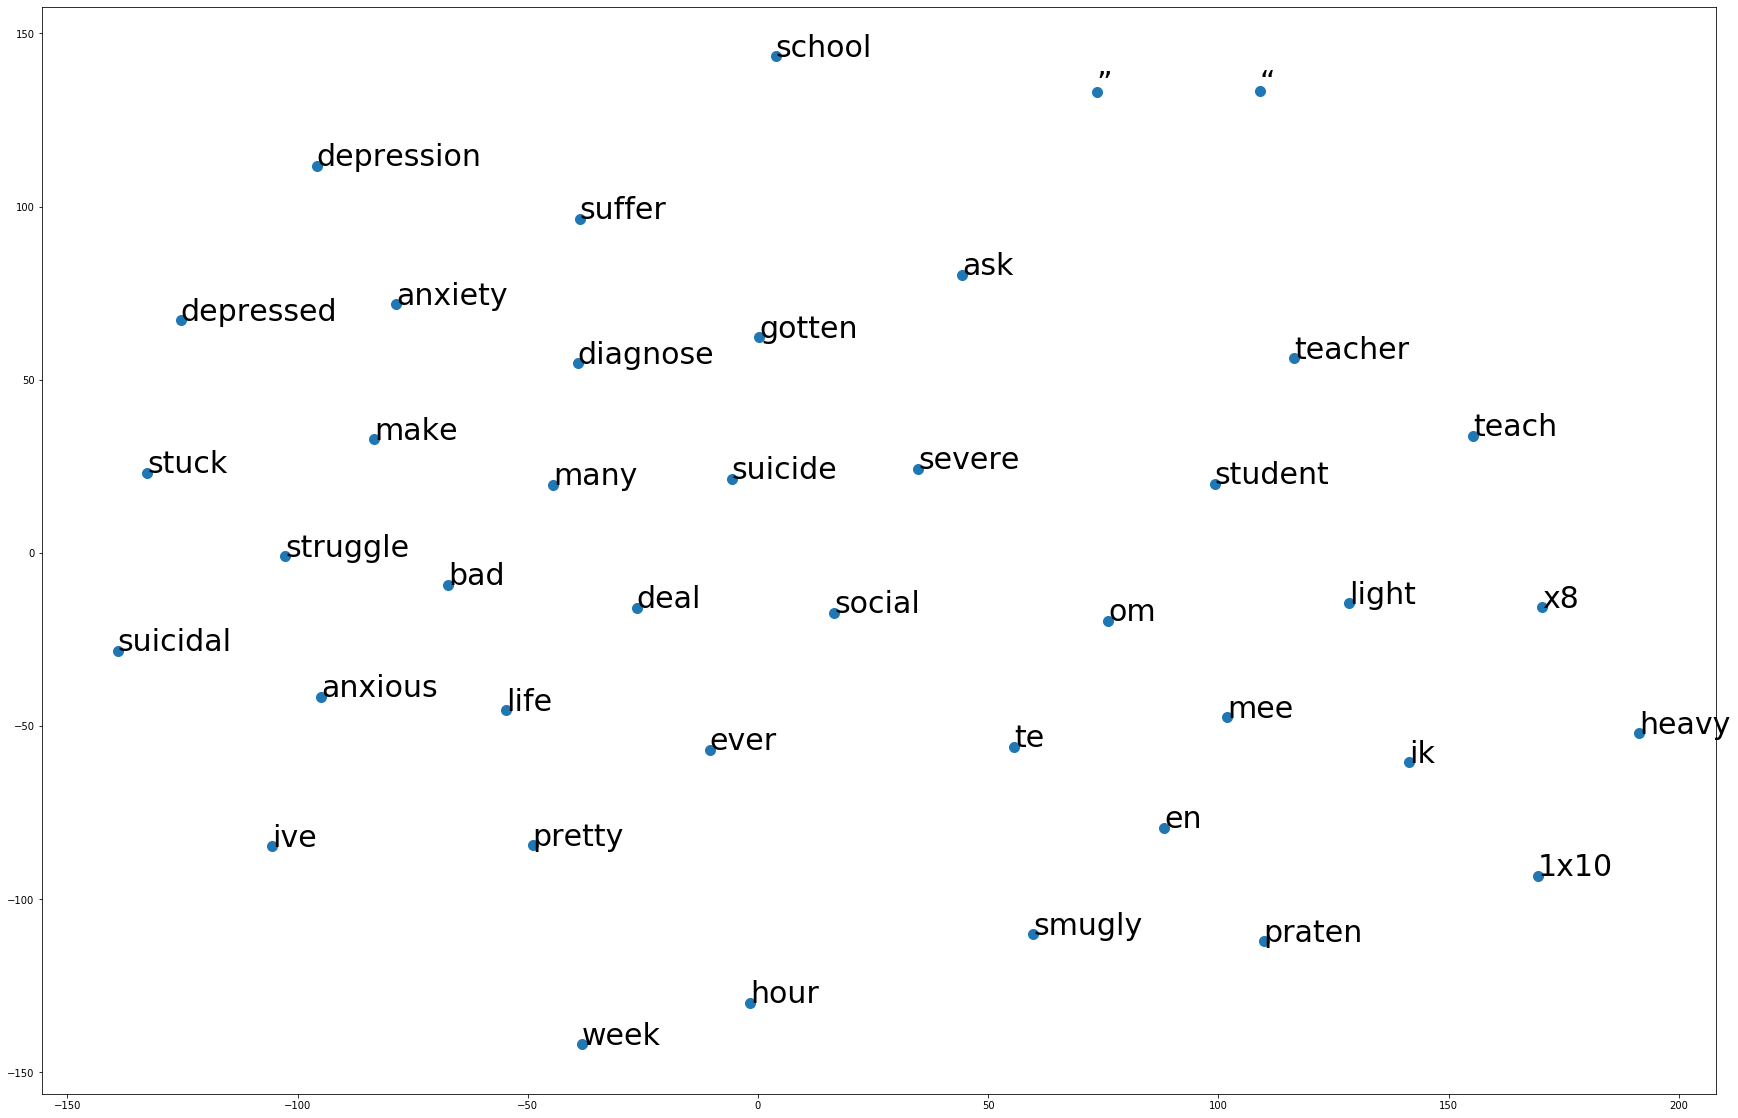

,X,Y
ik,141.441666,-60.542896
heavy,191.470627,-52.185303
1x10,169.452621,-93.276917
x8,170.340561,-15.762419
teacher,116.413307,56.199039
”,73.601341,133.015579
“,108.946434,133.321671
teach,155.383682,33.798145
student,99.216782,19.961418
light,128.480148,-14.647905


In [2081]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocab = [i[0] for i in depressed_n+depressed_p]
vocab.append('depression')
vocab_v = w2v_model.wv[vocab]

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(vocab_v)
df = pd.DataFrame(X_tsne, index = vocab, columns = ['X','Y'])
fig = plt.figure()
fig.set_size_inches(30,20)

ax = fig.add_subplot(1,1,1)
ax.scatter(df['X'], df['Y'],s = 100)


for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize = 30)
plt.show()
df

In [2089]:
x_train = []
for sen in train:
    x_train.append(np.mean([w2v_model.wv[token] for token in sen], axis=0))

x_test = []
for sen in test:
    x_test.append(np.mean([w2v_model.wv[token] for token in sen], axis=0))

In [2090]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',C = 1) #(kernel = >방사 기저함수,default,C=>파라미터들의 오차허용 정도,gamma => 결정 경계의 유연성정도)
classifier.fit(x_train,y_train)

TP = 0 #dep예측, 실제값 dep
TN = 0 #nonM예측, 실제값 nonM
FP = 0 #nonM예측, 실제값 dep
FN = 0 #dep예측, 실제값 nonM
for i in range(len(x_test)):
    if(classifier.predict([x_test[i]]) == y_test[i]):
        if(y_test[i] == 1):
            TP = TP + 1
        else:
            TN = TN + 1
    elif(classifier.predict([x_test[i]]) != y_test[i]):
        if(y_test[i] == 1):
            FP = FP + 1
        else:
            FN = FN + 1
    else:
        print(classifier.predict[x_test[i]],y_test[i])

print("dep으로 예측 및 맞춘 횟수: ",TP)
print("nonM으로 예측 및 맞춘 횟수: ",TN)
print("dep으로 예측 및 틀린 횟수(nonM이 실제값)",FN)
print("nonM으로 예측 및 틀린 횟수(dep이 실제값)",FP)

a = TP+TN+FN+FP
accuracy = (TP + TN)/(TP+TN+FN+FP)
precision = (TP)/(TP+FP)
recall = (TP)/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print("총 데이터:",a)
print("accuracy: ",accuracy)
print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1_score)

dep으로 예측 및 맞춘 횟수:  266
nonM으로 예측 및 맞춘 횟수:  234
dep으로 예측 및 틀린 횟수(nonM이 실제값) 66
nonM으로 예측 및 틀린 횟수(dep이 실제값) 35
총 데이터: 601
accuracy:  0.831946755407654
precision:  0.8837209302325582
recall:  0.8012048192771084
f1_score:  0.8404423380726698


min_count !=0

In [2091]:
Train = []
for i in X_train['text'].values:
    empty = []
    for j in word_tokenize(i):
        if j not in stop_words:
            empty.append(j)
    Train.append(empty)

In [2092]:
Test = []
for i in X_test['text'].values:
    empty = []
    for j in word_tokenize(i):
        if j not in stop_words:
            empty.append(j)
    Test.append(empty)
    

In [2111]:
from gensim.models import Word2Vec
model = Word2Vec(Train, min_count = 9, size = 100, window = 5, sg = 1)

In [2112]:
vocab = list(model.wv.vocab)

In [2113]:
Test1 = []
for i in Test:
    empty = []
    for j in i:
        if j in vocab:
            empty.append(j)
    Test1.append(empty)

In [2114]:
x_train = []
for sen in Train:
    x_train.append(np.mean([w2v_model.wv[token] for token in sen], axis=0))

x_test = []
for sen in Test1:
    x_test.append(np.mean([w2v_model.wv[token] for token in sen], axis=0))

In [2115]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',C = 1) #(kernel = >방사 기저함수,default,C=>파라미터들의 오차허용 정도,gamma => 결정 경계의 유연성정도)
classifier.fit(x_train,y_train)

TP = 0 #dep예측, 실제값 dep
TN = 0 #nonM예측, 실제값 nonM
FP = 0 #nonM예측, 실제값 dep
FN = 0 #dep예측, 실제값 nonM
for i in range(len(x_test)):
    if(classifier.predict([x_test[i]]) == y_test[i]):
        if(y_test[i] == 1):
            TP = TP + 1
        else:
            TN = TN + 1
    elif(classifier.predict([x_test[i]]) != y_test[i]):
        if(y_test[i] == 1):
            FP = FP + 1
        else:
            FN = FN + 1
    else:
        print(classifier.predict[x_test[i]],y_test[i])

print("dep으로 예측 및 맞춘 횟수: ",TP)
print("nonM으로 예측 및 맞춘 횟수: ",TN)
print("dep으로 예측 및 틀린 횟수(nonM이 실제값)",FN)
print("nonM으로 예측 및 틀린 횟수(dep이 실제값)",FP)

a = TP+TN+FN+FP
accuracy = (TP + TN)/(TP+TN+FN+FP)
precision = (TP)/(TP+FP)
recall = (TP)/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print("총 데이터:",a)
print("accuracy: ",accuracy)
print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1_score)

dep으로 예측 및 맞춘 횟수:  291
nonM으로 예측 및 맞춘 횟수:  178
dep으로 예측 및 틀린 횟수(nonM이 실제값) 122
nonM으로 예측 및 틀린 횟수(dep이 실제값) 10
총 데이터: 601
accuracy:  0.7803660565723793
precision:  0.9667774086378738
recall:  0.7046004842615012
f1_score:  0.8151260504201682
